## Model: Logistic Regression
Attribute Selection: None, using all features

In [1]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

def interpret_confusion_matrix(matrix, title, labels):
    encode, correct, errors, total = [],[],[],[]
    i=0
    for row in matrix:
        total.append(sum(row))
        correct.append(row[i])
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors.append(sum(consider))
        i+=1

    fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Correctly Classified","Incorrectly Classified","Total"]),cells=dict(values=[labels, correct, errors, total]))])
    fig.update_layout(title= title,width=650,height=400)

    fig.show()

labels = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

In [2]:
df = pd.read_csv("Data/DataEncoded.csv")

X=df.iloc[:,:-1]
y=df["NObeyesdad"]

#### Training, Testing

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
logistic_regression = LogisticRegression(random_state=42,max_iter=1000000,solver="newton-cg").fit(X_train,y_train)

#### Evaluation

Cross Validation Score: 0.8317245657568237
Precision Score: 0.8328990914750829
Recall Score: 0.8350515463917526
F1 score: 0.831787103826362
Accuracy: 0.8350515463917526

Confusion Matrix
-----------------


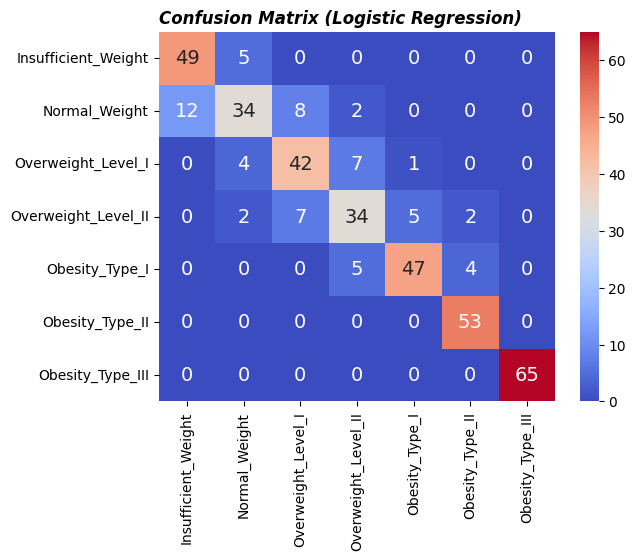

In [4]:
ypred = logistic_regression.predict(X_test)

cv_score = np.array(cross_val_score(logistic_regression, X_train,y_train, cv=10)).mean()
cf_matrix = confusion_matrix(y_test,ypred)
metrics = precision_recall_fscore_support(y_test,ypred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(y_test,ypred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

df_cm = pd.DataFrame(cf_matrix, labels, labels)
print("\nConfusion Matrix\n-----------------")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap = 'coolwarm',) # font size
plt.title("Confusion Matrix (Logistic Regression)",loc='left', fontweight='bold',  style='italic')
plt.savefig('Graphs/Confusion Matrix (Logistic Regression).png', bbox_inches='tight')
plt.show()

interpret_confusion_matrix(cf_matrix, "Breakdown of Confusion Matrix (Logistic Regression)", labels)        
